### Reading and Understanding the Data:

In [1]:
#Importing all the Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
cars1 = pd.read_csv('E:\Data Science Internship\Coding Raja\Car Price Optimization\Car Data.csv')
test_cars = pd.read_csv('E:\Data Science Internship\Coding Raja\Car Price Optimization\Car Testing.csv')
cars1.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950


In [3]:
cars1.shape

(176, 26)

In [4]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          176 non-null    int64  
 1   normalized-losses  176 non-null    object 
 2   make               176 non-null    object 
 3   fuel-type          176 non-null    object 
 4   aspiration         176 non-null    object 
 5   num-of-doors       176 non-null    object 
 6   body-style         176 non-null    object 
 7   drive-wheels       176 non-null    object 
 8   engine-location    176 non-null    object 
 9   wheel-base         176 non-null    float64
 10  length             176 non-null    float64
 11  width              176 non-null    float64
 12  height             176 non-null    float64
 13  curb-weight        176 non-null    int64  
 14  engine-type        176 non-null    object 
 15  num-of-cylinders   176 non-null    object 
 16  engine-size        176 non

In [5]:
cars1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,0.914773,98.359091,173.357386,65.762500,53.686364,2534.954545,125.130682,10.127386,25.409091,31.034091
std,1.194563,5.628837,12.167599,2.007119,2.505841,506.959810,39.848713,3.938802,6.677273,6.950353
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,51.900000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,96.900000,172.800000,65.450000,54.100000,2410.000000,110.500000,9.000000,24.000000,30.000000
75%,2.000000,100.400000,181.550000,66.500000,55.525000,2912.750000,141.000000,9.400000,30.250000,36.250000
max,3.000000,114.200000,199.600000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Visualising and preparing the Data:

In [6]:
ordinal_values_cols = ['normalized-losses', 'wheel-base', 'make','length', 'width', 'height','curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
test_ordinal_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
car_features = cars1[ordinal_values_cols]
test_car_features = test_cars[test_ordinal_values_cols]
test_car_features.head(4)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,103,104.3,188.8,67.2,56.2,2912,3.78,3.15,9.5,114,5400,23,28
1,74,104.3,188.8,67.2,57.5,3034,3.78,3.15,9.5,114,5400,23,28
2,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28
3,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25


In [7]:
lb_make = LabelEncoder()
car_features['make'] = lb_make.fit_transform(car_features['make'])

C:\Users\dasra\AppData\Local\Temp\ipykernel_15028\3210688463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features['make'] = lb_make.fit_transform(car_features['make'])


In [8]:
car_features['make'].head(10)

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    2
9    2
Name: make, dtype: int32

In [9]:
car_features.replace('?', np.nan, inplace=True)
test_car_features.replace('?', np.nan, inplace=True)
car_features = car_features.astype(float)
test_car_features = test_car_features.astype(float)
car_features.shape[0]

#test_car_features.shape[0]
test_car_features.head(4)


C:\Users\dasra\AppData\Local\Temp\ipykernel_15028\3215330425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features.replace('?', np.nan, inplace=True)
C:\Users\dasra\AppData\Local\Temp\ipykernel_15028\3215330425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_car_features.replace('?', np.nan, inplace=True)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,103.0,104.3,188.8,67.2,56.2,2912.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
1,74.0,104.3,188.8,67.2,57.5,3034.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
2,95.0,109.1,188.8,68.9,55.5,2952.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
3,95.0,109.1,188.8,68.8,55.5,3049.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0


In [10]:
car_features = car_features.dropna(subset=['price'])
test_car_features.isnull().sum()
car_features.isnull().sum()

normalized-losses    33
wheel-base            0
make                  0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
#replace any remaining null values with the mean value of their respective column
car_features = car_features.fillna(car_features.mean())

test_car_features = test_car_features.fillna(test_car_features.mean())
test_car_features.isnull().sum()
car_features.isnull().sum()

normalized-losses    0
wheel-base           0
make                 0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
car_features.head(4)

,normalized-losses,wheel-base,make,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.685714,88.6,0.0,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.685714,88.6,0.0,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.685714,94.5,0.0,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.000000,99.8,1.0,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0


In [13]:
car_features.to_csv('cars_features.csv')
test_car_features.to_csv('testcars_features.csv')

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


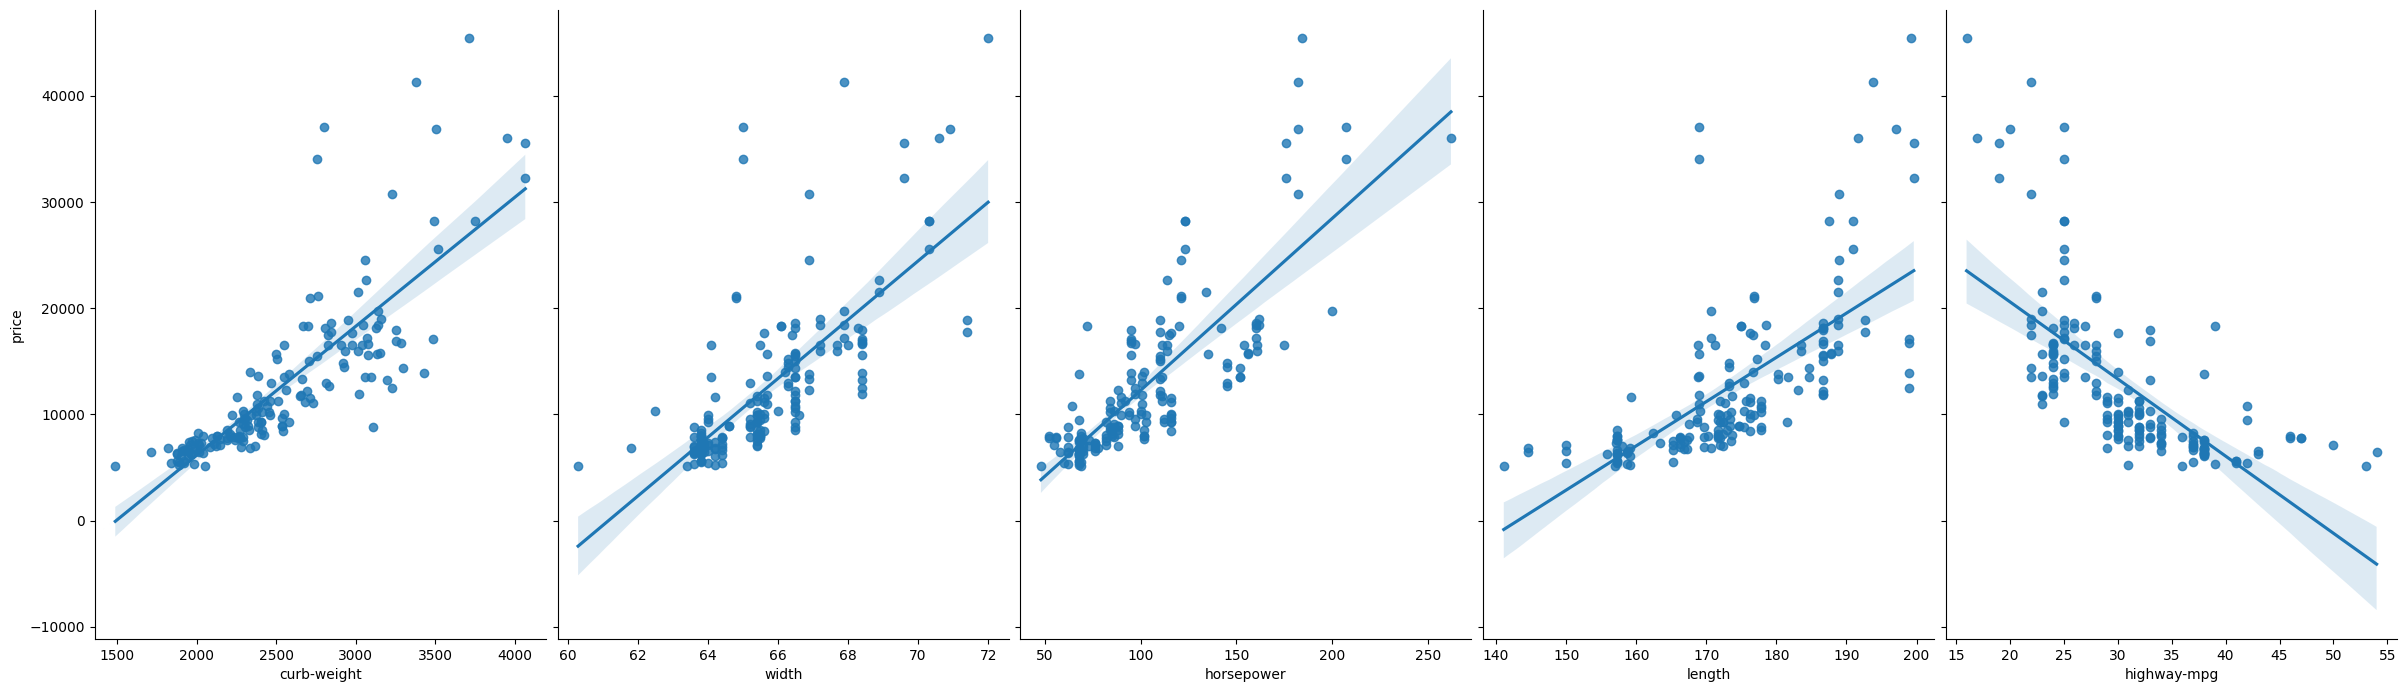

In [14]:
sns.pairplot(car_features, x_vars=['curb-weight','width','horsepower','length','highway-mpg'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [15]:
feature_cols=['curb-weight','width','horsepower']
X = car_features[feature_cols]
y = car_features['price']

### Splitting the Data into Training and Testing Sets:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
print(X_train.shape)
print(y_train.shape)

(129, 3)
(129,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(44, 3)
(44,)


In [19]:
linregg = LinearRegression()

# fitting the model to the training data
linregg.fit(X_train, y_train)

LinearRegression()

In [20]:
print(linregg.intercept_)
print(linregg.coef_)
list(zip(feature_cols, linregg.coef_))

-71279.79703821536
[  4.70512889 961.72450365  86.39620276]


[('curb-weight', 4.705128890399279),
 ('width', 961.7245036463783),
 ('horsepower', 86.39620275536038)]

In [21]:
y_pred = linregg.predict(X_test)

In [22]:
#mse
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3870.7012245702726


In [23]:
feature_cols = ['horsepower','curb-weight']

#selecting a subset of the original DataFrame
X = car_features[feature_cols]

# selecting a Series from the DataFrame
y = car_features.price


In [24]:
# splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fitting the model 
linregg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = linregg.predict(X_test)

# computing the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3571.176534244652


In [25]:
prediction = linregg.predict(test_car_features[feature_cols])
test_car_features['price'] = prediction
test_car_features.to_csv('linear_regg.csv')